In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

In [3]:
mu_1 = 102
mu_2 = 100
sigma = 10
n1 = 20
n2 = 25

In [4]:
mean_difference = abs(mu_1 - mu_2)
pooled_sd = np.sqrt(((n1 - 1) * sigma**2 + (n2 - 1) * sigma**2) / (n1 + n2 - 2))
cohen_d = mean_difference / pooled_sd

print("Cohen's d effect size:", cohen_d)

Cohen's d effect size: 0.2


In [5]:
n_samples = 50000

res = []

for i in range(n_samples):
    # Get random samples 
    y1 = np.random.normal(loc=mu_1, scale=sigma, size=n1)
    y2 = np.random.normal(loc=mu_2, scale=sigma, size=n2)
    # Compute effect size
    y1bar = y1.mean()
    y2bar = y2.mean()
    v1 = np.var(y1, ddof=1)
    v2 = np.var(y2, ddof=1)
    s = np.sqrt(((n1-1)*v1 + (n2-1)*v2) / (n1 + n2 - 2))
    efsize = (y1bar - y2bar) / s
    # Compute p-value
    out = stats.ttest_ind(a=y1, b=y2, equal_var=True)
    # Save effect size only for 'statistically significant' results
    if out.pvalue < 0.05:
        res.append(efsize)


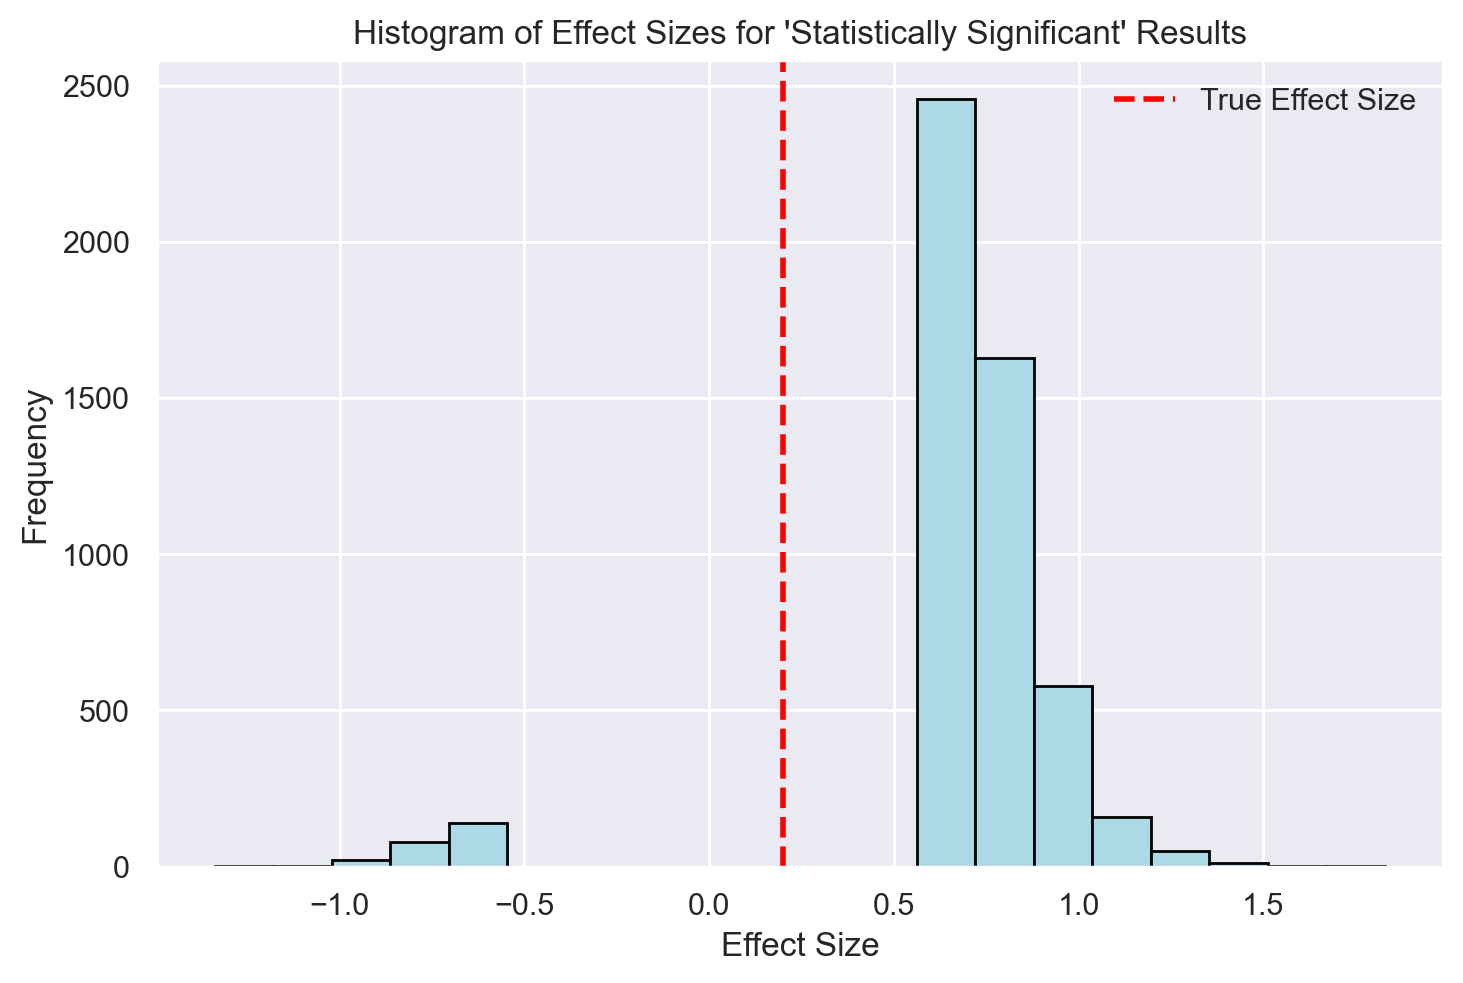

In [6]:
plt.hist(res, bins=20, color="lightblue", edgecolor="black")
plt.axvline(
    x=0.2, color="red", linestyle="dashed", linewidth=2, label="True Effect Size"
)
plt.xlabel("Effect Size")
plt.ylabel("Frequency")
plt.title("Histogram of Effect Sizes for 'Statistically Significant' Results")
plt.legend()
_ = plt.show()

In [7]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Fri Jan 26 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

scipy     : 1.11.4
seaborn   : 0.13.0
numpy     : 1.26.2
matplotlib: 3.8.2
arviz     : 0.17.0

Watermark: 2.4.3

